# TOPIC:  Building an Regression MLP Using the Sequential API

In [4]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


# 1/ Loading the California_Housing dataset using Skit-Learn

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
# load the dataset and split it into: training, test, and validation sets
housing = fetch_california_housing()
X_train_full,X_test,y_train_full, y_test = train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(11610, 8)
(11610,)
(3870, 8)
(3870,)
(5160, 8)
(5160,)


# 2/ Processing data

In [6]:
from sklearn.preprocessing import StandardScaler
# Scaling datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# 3/ Building an Classifier Using the Sequential API

In [7]:
# Create the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),  # converting each input to a 1D array
    keras.layers.Dense(30,activation='relu'),  # 300 neurons, using ReLU activation function.
    keras.layers.Dense(1),                  # output layer: 1 neuron, No activation function
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


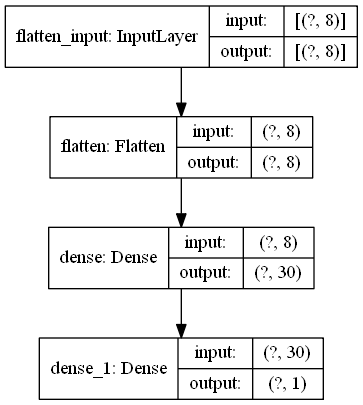

In [8]:
keras.utils.plot_model(model, show_shapes=True)

In [9]:
# Compile the model
model.compile(loss="mean_squared_error",
              optimizer="sgd")

# Training the model
history = model.fit(X_train,y_train,epochs=20, validation_data=(X_valid,y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 66us/sample - loss: 1.2580 - val_loss: 0.8448
Epoch 2/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.8568 - val_loss: 0.5384

# 4/ Evaluating the Performance of the Model

### 4.1/ On the training and validation sets

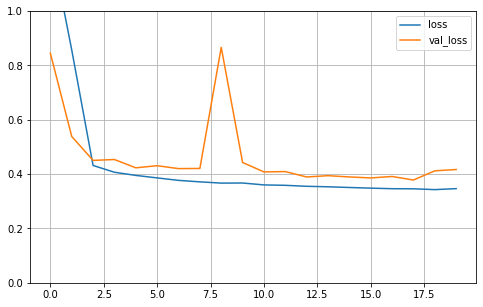

,loss,val_loss
19,0.34643,0.41677


In [10]:
# plot the learning curves
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

display(history_df.iloc[[-1]])

- Both training and validation losses are decreasing.

### 4.2/ On the testing set

In [11]:
mse_test = model.evaluate(X_test,y_test)

5160/5160 [==============================] - 0s 14us/sample - loss: 0.3719


# 5/ Using the Model to Make Predictions

In [12]:
# Testing on the first 5 samples of the testing set
X_new = X_test[:5]
y_pred = model.predict(X_new)
print(f'y_pred   : {y_pred.transpose()[0][:]}')
print(f'y_actual : {y_test[:5]}')

y_pred   : [4.5824747 2.8199291 1.4115069 1.2407112 2.402676 ]
y_actual : [5.00001 1.908   1.388   1.161   3.229  ]


In [13]:
def build_model(n_hidden = 1, n_neurons = 30, learn_rate = 3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for i in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learn_rate)
    model.compile(loss="mse",optimizer=optimizer)

    
    return model


In [15]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


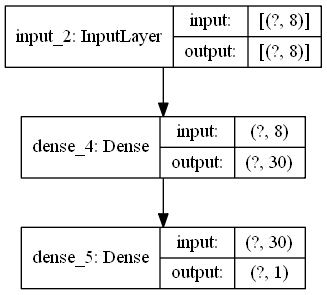

In [16]:
keras.utils.plot_model(model, show_shapes=True)

